#QUESTION B


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#CREATE DATASET

In [23]:
ds={"BMI":[33.6,26.6,23.4,43.1,35.3,35.9,36.7,25.7,23.3,31],"AGE":[50,30,40,67,23,67,45,46,29,56],"SUGAR":[1,0,0,0,1,1,1,0,0,1]}

In [150]:
dataset=pd.read_csv("ds.csv")

In [151]:
dataset

,"ds={""BMI"":[33.6",26.6,23.4,43.1,35.3,35.9,36.7,25.7,23.3,31],...,SUGAR:[1,0,0.1,0.2,1,1.1,1.2,0.3,0.4,1]}


In [25]:
ds

{'BMI': [33.6, 26.6, 23.4, 43.1, 35.3, 35.9, 36.7, 25.7, 23.3, 31],
 'AGE': [50, 30, 40, 67, 23, 67, 45, 46, 29, 56],
 'SUGAR': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1]}

In [27]:
df=pd.DataFrame(ds)

In [51]:
df

,BMI,AGE,SUGAR
0,33.6,50,1
1,26.6,30,0
2,23.4,40,0
3,43.1,67,0
4,35.3,23,1
5,35.9,67,1
6,36.7,45,1
7,25.7,46,0
8,23.3,29,0
9,31.0,56,1


#IMPLEMENT KNN 

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [58]:
newdf=sc.fit_transform(df.drop("SUGAR",axis=1))
newdf

array([[ 0.34243551,  0.32401467],
       [-0.77768063, -1.05477115],
       [-1.28973373, -0.36537824],
       [ 1.86259312,  1.49598261],
       [ 0.61446371, -1.53734619],
       [ 0.71047367,  1.49598261],
       [ 0.83848694, -0.02068179],
       [-0.92169557,  0.0482575 ],
       [-1.30573539, -1.12371044],
       [-0.07360763,  0.73765041]])

In [60]:
X=pd.DataFrame(newdf)
X

,0,1
0,0.342436,0.324015
1,-0.777681,-1.054771
2,-1.289734,-0.365378
3,1.862593,1.495983
4,0.614464,-1.537346
5,0.710474,1.495983
6,0.838487,-0.020682
7,-0.921696,0.048258
8,-1.305735,-1.123710
9,-0.073608,0.737650


In [116]:
Y=df["SUGAR"]
Y

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    0
9    1
Name: SUGAR, dtype: int64

In [64]:

from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt=train_test_split(X,Y,test_size=.3,random_state=42)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [70]:
knn.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=3)

In [94]:
pred=knn.predict(xt)
pred

array([0, 0, 1])

In [72]:
from sklearn.metrics import classification_report,accuracy_score


In [73]:
classification_report(pred,yt)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         2\n           1       1.00      1.00      1.00         1\n\n    accuracy                           1.00         3\n   macro avg       1.00      1.00      1.00         3\nweighted avg       1.00      1.00      1.00         3\n'

In [74]:
accuracy_score(pred,yt)

1.0

#FIND THE CLASSIFICATION
BMI=43.6, AGE=40

In [135]:
test={'BMI':[43.6],
      'AGE':[40],
      'Sugar':[np.NaN]}

In [136]:
test1=pd.DataFrame(test)
test1

,BMI,AGE,Sugar
0,43.6,40,NaN


In [137]:
t=test1.iloc[:,:2]

In [140]:
t_pred=knn.predict(t)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [142]:
t_pred

array([1])

#DRAW SCATTER PLOT OF THE DATASET

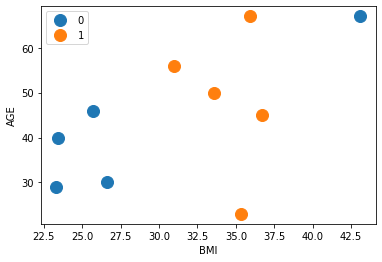

In [149]:
groups = df.groupby('SUGAR')
for name, group in groups:
    plt.plot(group.BMI, group.AGE, marker='o', linestyle='', markersize=12,label=name)
    plt.xlabel("BMI")
    plt.ylabel("AGE")

plt.legend()